In [2]:
import sys
# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マウントを行う
    from google.colab import drive
    drive.mount('/content/drive')
else:
    print("Not Google Colab")

Not Google Colab


In [3]:
import sys
# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # ライブラリのインストール
    !pip install opencv-python==4.5.5.62
else:
    print("Not Google Colab")

Not Google Colab


In [6]:
import csv
import os
import pickle
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
#import seaborn as sns
#sns.set(font="IPAexGothic",style="white")
import cv2
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF
%matplotlib inline
# "%matplotlib inline" の代わりに以下のコマンドを使用できる場合、3次元で座標軸を操作可能なプロットを表示することができます。
# %matplotlib notebook

# 乱数シードを指定
np.random.seed(seed=0)
"""
#日本語をグラフに入れる
!pip install japanize_matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

sns.set(font="IPAexGothic")
"""

'\n#日本語をグラフに入れる\n!pip install japanize_matplotlib\nimport matplotlib.pyplot as plt\nimport japanize_matplotlib\nimport seaborn as sns\n\nsns.set(font="IPAexGothic")\n'

In [7]:
"""
def plot_data(data, name='Data Plot'): #データの可視化に使用
    # グラフ作成
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 軸ラベルの設定
    ax.set_xlabel("X0-axis")
    ax.set_ylabel("X1-axis")
    ax.set_zlabel("Y-axis")

    # 表示範囲の設定
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(0, 10)

    ax.plot(data[:, 0], data[:, 1], data[:, 2],
            "o", color="#ff2222", ms=2, mew=0.5)
    ax.set_title(name)
    plt.show()
"""

'\ndef plot_data(data, name=\'Data Plot\'): #データの可視化に使用\n    # グラフ作成\n    fig = plt.figure()\n    ax = fig.add_subplot(111, projection=\'3d\')\n\n    # 軸ラベルの設定\n    ax.set_xlabel("X0-axis")\n    ax.set_ylabel("X1-axis")\n    ax.set_zlabel("Y-axis")\n\n    # 表示範囲の設定\n    ax.set_xlim(-2, 2)\n    ax.set_ylim(-2, 2)\n    ax.set_zlim(0, 10)\n\n    ax.plot(data[:, 0], data[:, 1], data[:, 2],\n            "o", color="#ff2222", ms=2, mew=0.5)\n    ax.set_title(name)\n    plt.show()\n'

In [8]:
# データの読み込み
train = pd.read_csv("/content/drive/MyDrive/データサイエンティスト/SIGNATE/お弁当/train.csv")
test = pd.read_csv("/content/drive/MyDrive/データサイエンティスト/SIGNATE/お弁当/test.csv")
#sample = pd.read_csv("/content/drive/MyDrive/データサイエンティスト/SIGNATE/お弁当/sample.csv")
sample = pd.read_csv("/content/drive/MyDrive/データサイエンティスト/SIGNATE/お弁当/sample.csv",header=None) # header=None にすると最初の行もデータとして読み込まれるように指定するためのオプション
print("Data Shapes")
print("Train:",train.shape, "Test:",test.shape, "Sample:",sample.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/データサイエンティスト/SIGNATE/お弁当/train.csv'

In [ ]:
train.index = pd.to_datetime(train["datetime"]) # pd.to_datetime() 関数は、日時を表すオブジェクトをPandasの日時型に変換
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,,
2013-11-18,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [ ]:
# DataFrameの"week"列を変換する
train["week"] = train["week"].replace("月", "Monday")
train["week"] = train["week"].replace("火", "Tuesday")
train["week"] = train["week"].replace("水", "Wednesday")
train["week"] = train["week"].replace("木", "Thursday")
train["week"] = train["week"].replace("金", "Friday")
train["week"] = train["week"].replace("土", "Saturday")
train["week"] = train["week"].replace("日", "Sunday")
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,,
2013-11-18,2013-11-18,90,Monday,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,2013-11-19,101,Tuesday,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,2013-11-20,118,Wednesday,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,2013-11-21,120,Thursday,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,2013-11-22,130,Friday,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [ ]:
# DataFrameの"week"列を変換する
test["week"] = test["week"].replace("月", "Monday")
test["week"] = test["week"].replace("火", "Tuesday")
test["week"] = test["week"].replace("水", "Wednesday")
test["week"] = test["week"].replace("木", "Thursday")
test["week"] = test["week"].replace("金", "Friday")
test["week"] = test["week"].replace("土", "Saturday")
test["week"] = test["week"].replace("日", "Sunday")
test.head()

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-10-1,Wednesday,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2
1,2014-10-2,Thursday,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9
2,2014-10-3,Friday,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7
3,2014-10-6,Monday,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5
4,2014-10-7,Tuesday,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1


In [ ]:
sample.head()

,0,1
0,2014-10-1,24
1,2014-10-2,71
2,2014-10-3,25
3,2014-10-6,32
4,2014-10-7,60


In [ ]:
train.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [ ]:
# データ構造とデータ型をチェック
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2013-11-18 to 2014-09-30
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 21.0+ KB


In [ ]:
# 要約統計量をチェック
train.describe(include="O") # include="O" と指定することで、オブジェクト型の列（文字列型の列）のみが対象

,datetime,week,name,remarks,event,weather,precipitation
count,207,207,207,21,14,207,207
unique,207,5,156,6,2,7,8
top,2013-11-18,Wednesday,メンチカツ,お楽しみメニュー,ママの会,快晴,--
freq,1,43,6,12,9,53,169


In [ ]:
# 欠損のチェック
train.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

In [1]:
# 欠損のチェック
test.isnull().sum()

NameError: name 'test' is not defined

In [ ]:
train["payday"] = train["payday"].fillna(0)
train["precipitation"] = train["precipitation"].apply(lambda x : -1 if x == "--" else float(x)) # apply() メソッドを使用して、ラムダ関数（無名関数）を各要素に適用（データを変換する"--"なら-1でそれ以外はfloat型へ）
train["event"] = train["event"].fillna("なし")
train["remarks"] = train["remarks"].fillna("なし")
train["month"] = train["datetime"].apply(lambda x : int(x.split("-")[1])) # lambda x : int(x.split("-")[1]) の部分は、各要素 x を処理するための無名関数です。この関数は、文字列 x をハイフン（-）で分割し、分割結果のリストの2番目の要素（月）を整数に変換

<Axes: xlabel='datetime'>

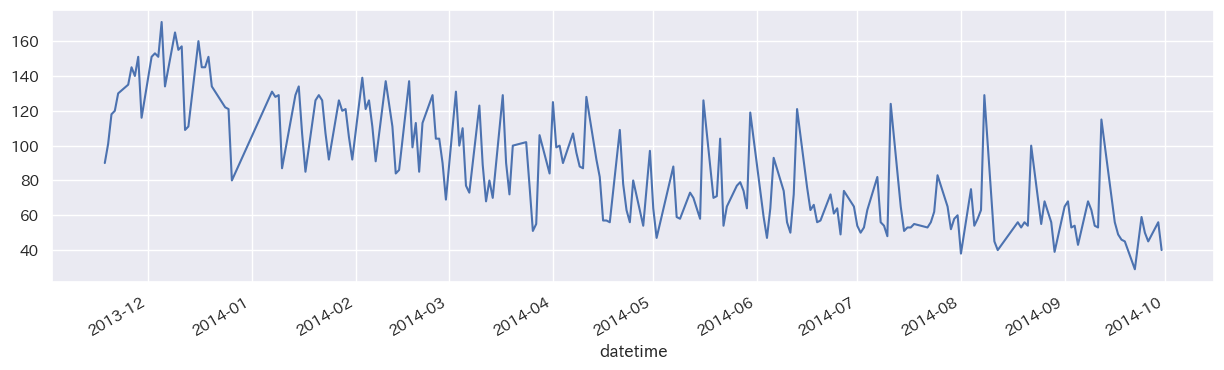

In [ ]:
train["y"].plot(figsize=(15,4))

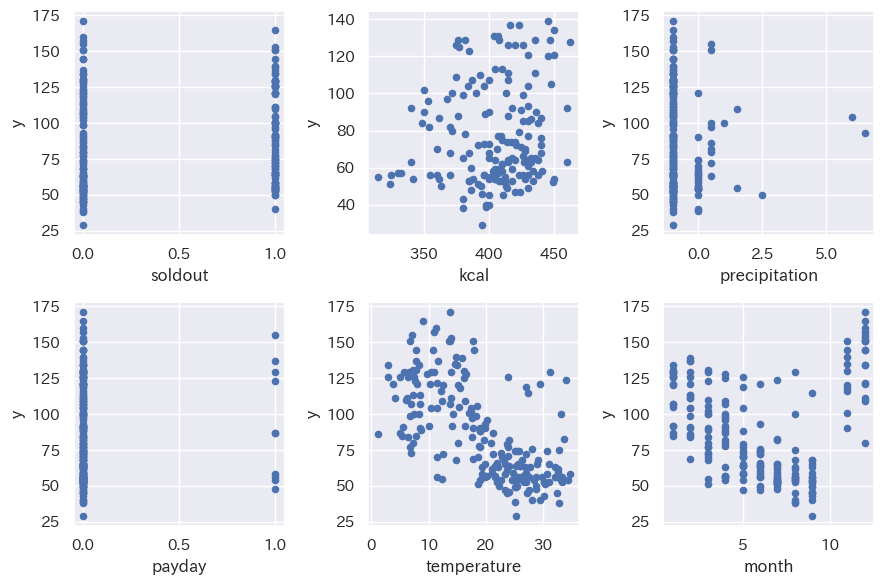

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(9,6)) # 2行3列のサブプロットを持つ図で9インチの幅と6インチの高さ
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2]) # precipitation=降水量
train.plot.scatter(x="payday", y="y", ax=ax[1][0]) # 給料日
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
train.plot.scatter(x="month", y="y", ax=ax[1][2])
plt.tight_layout()

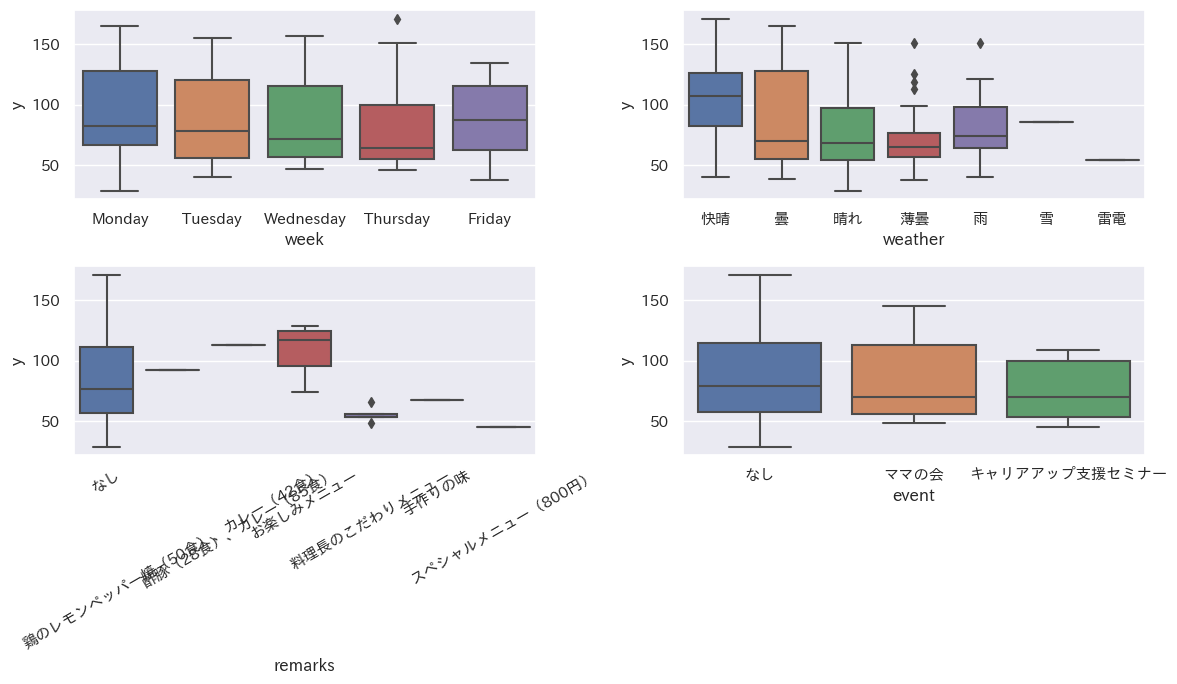

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,7))
sns.boxplot(x="week",y="y",data=train,ax=ax[0][0])
sns.boxplot(x="weather",y="y",data=train,ax=ax[0][1])
sns.boxplot(x="remarks",y="y",data=train,ax=ax[1][0])
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(),rotation=30)
sns.boxplot(x="event",y="y",data=train,ax=ax[1][1])
plt.tight_layout()

<Axes: xlabel='datetime'>

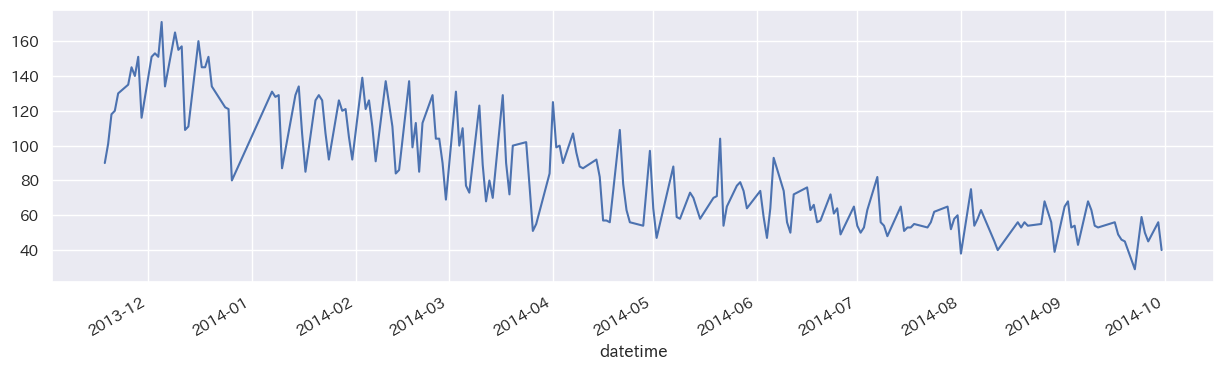

In [ ]:
train[train["remarks"]!="お楽しみメニュー"]["y"].plot(figsize=(15,4))

<Axes: xlabel='fun', ylabel='y'>

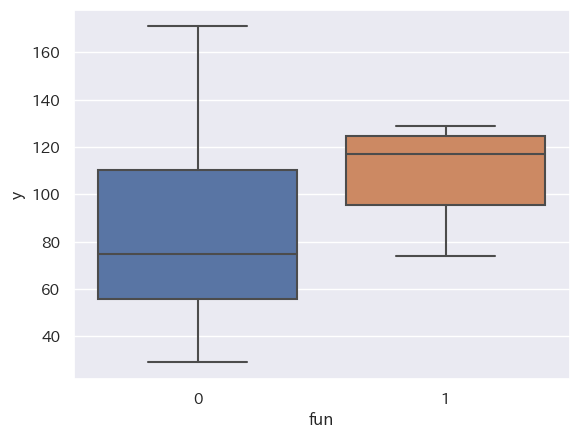

In [ ]:
train["fun"] = train["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
sns.boxplot(x="fun",y="y",data=train)

In [ ]:
from scipy.stats import median_test
stat,p,med,tbl = median_test(train[train["fun"]==1]["y"],train[train["fun"]==0]["y"])
print("p",p,"stat",stat)

p 0.007057960766247775 stat 7.2581589841730345


<Axes: xlabel='datetime'>

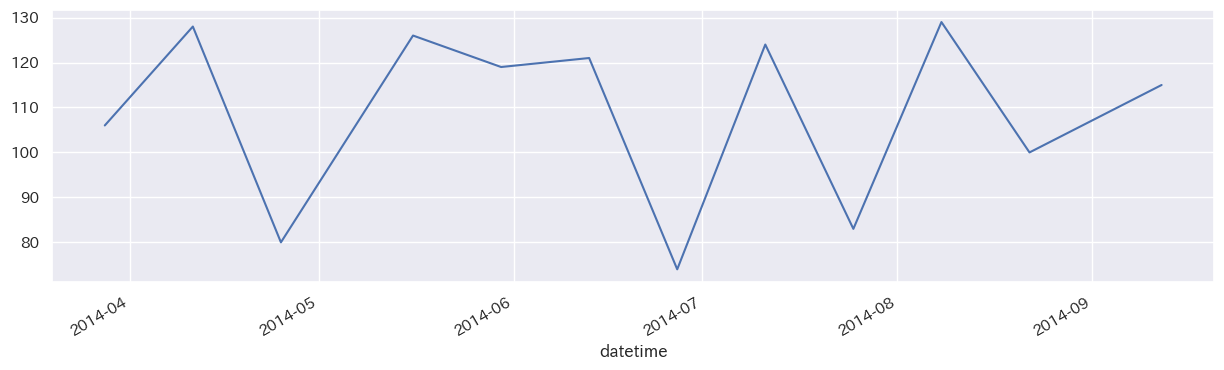

In [ ]:
train[train["remarks"]=="お楽しみメニュー"]["y"].plot(figsize=(15,4))

In [ ]:
train[train["remarks"]=="お楽しみメニュー"]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,fun
datetime,,,,,,,,,,,,,,
2014-03-28,2014-3-28,106,Friday,0,キーマカレー,NaN,お楽しみメニュー,なし,0.0,快晴,-1.0,18.5,3,1
2014-04-11,2014-4-11,128,Friday,1,チキンカレー,NaN,お楽しみメニュー,なし,0.0,快晴,-1.0,16.5,4,1
2014-04-25,2014-4-25,80,Friday,0,中華丼,NaN,お楽しみメニュー,なし,0.0,晴れ,-1.0,20.8,4,1
2014-05-16,2014-5-16,126,Friday,0,ポークカレー,NaN,お楽しみメニュー,ママの会,0.0,快晴,-1.0,23.8,5,1
2014-05-30,2014-5-30,119,Friday,0,チキンカレー,NaN,お楽しみメニュー,なし,0.0,薄曇,-1.0,26.9,5,1
2014-06-13,2014-6-13,121,Friday,0,キーマカレー,NaN,お楽しみメニュー,なし,0.0,晴れ,-1.0,29.5,6,1
2014-06-27,2014-6-27,74,Friday,0,牛丼,NaN,お楽しみメニュー,なし,0.0,雨,0.0,25.4,6,1
2014-07-11,2014-7-11,124,Friday,0,ポークカレー,NaN,お楽しみメニュー,なし,0.0,晴れ,-1.0,33.9,7,1
2014-07-25,2014-7-25,83,Friday,0,ひやしたぬきうどん・炊き込みご飯,NaN,お楽しみメニュー,なし,0.0,晴れ,-1.0,33.6,7,1


<Axes: xlabel='curry', ylabel='y'>

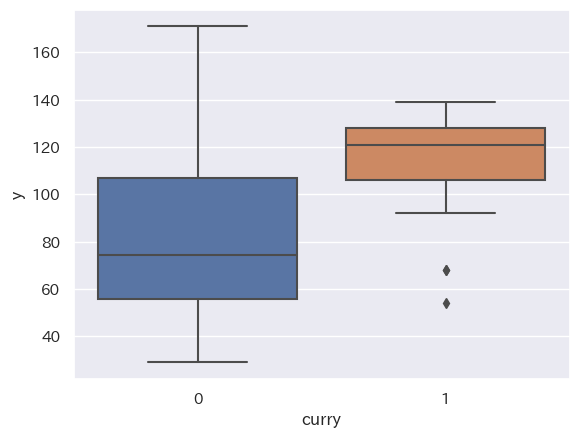

In [ ]:
train["curry"] = train["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)
sns.boxplot(x="curry",y="y",data=train)

In [ ]:
stat,p,med,tbl = median_test(train[train["curry"]==1]["y"],train[train["curry"]==0]["y"])
print("p:",p,"stat",stat)

p: 0.010699742900892427 stat 6.514516162828877


In [ ]:
# 日数が経過するにつれて減衰している為、売上数と日数の単回帰モデルを軸に検討する
train["t"] = 1
test["t"] = 0
dat = pd.concat([train,test],sort=True).reset_index(drop=True)

In [ ]:
dat.index = pd.to_datetime(dat["datetime"])
dat = dat["2014-05-01":]
dat = dat.reset_index(drop=True)

dat["days"] = dat.index
dat["precipitation"] = dat["precipitation"].apply(lambda x : -1 if x=="--" else x).astype(np.float)
dat["fun"] = dat["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
dat["curry"] = dat["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)

cols = ["precipitation","weather","days","fun","curry","y"]

<ipython-input-25-b1ea195b507c>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dat["precipitation"] = dat["precipitation"].apply(lambda x : -1 if x=="--" else x).astype(np.float)


In [ ]:
def learning(trainX,y_train):
    model1 = LR()
    model2 = RF(n_estimators=100,max_depth=4,random_state=777) # お楽しみメニューやカレー等は大きく寄与はしていそうだが、非線形な関係であることも考慮し、Random Forestを用いて単回帰モデルの結果を修正するモデルも作成
    model1.fit(trainX["days"].values.reshape(-1,1),y_train)              # 決定木の数=100, 各決定木の最大の深さ=4(モデルの複雑さを調整), ランダムシード=777(乱数生成の初期化に使用され、再現性を確保するために設定)
    pred = model1.predict(trainX["days"].values.reshape(-1,1))         # trainX["days"]列の値を1列の配列に変換

    pred_sub = y_train - pred
    model2.fit(trainX.iloc[:, ~trainX.columns.str.match("y")],pred_sub)  # trainXの特徴量（目的変数列以外の列）を抽出している。ilocを使用することで、行と列の位置に基づいたインデックス指定が可能です。
    return model1, model2

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=777)
tr = dat[dat["t"]==1][cols]

trains = []
tests = []
for train_index, test_index in kf.split(tr):
    tr.loc[train_index,"tt"] = 1
    tr.loc[test_index,"tt"] = 0
    tr["tt"] = tr["tt"].astype(np.int)
    tmp = pd.get_dummies(tr)

    trainX = tmp[tmp["tt"]==1]
    del trainX["tt"]
    testX = tmp[tmp["tt"]==0]
    del testX["tt"]
    y_train = tmp[tmp["tt"]==1]["y"]
    y_test = tmp[tmp["tt"]==0]["y"]

    model1, model2 = learning(trainX, y_train)

    pred_train = model1.predict(trainX["days"].values.reshape(-1,1)) + model2.predict(trainX.iloc[:, ~trainX.columns.str.match("y")])
    pred_test = model1.predict(testX["days"].values.reshape(-1,1)) + model2.predict(testX.iloc[:, ~testX.columns.str.match("y")])

    print("TRAIN:",MSE(y_train,pred_train)**0.5, "VARIDATE",MSE(y_test, pred_test)**0.5)
    trains.append(MSE(y_train,pred_train)**0.5)
    tests.append(MSE(y_test, pred_test)**0.5)
print("AVG")
print(np.array(trains).mean(), np.array(tests).mean())

<ipython-input-27-8fb7f70ecbcb>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tr["tt"] = tr["tt"].astype(np.int)


TRAIN: 7.878691946699353 VARIDATE 10.756255997126631


<ipython-input-27-8fb7f70ecbcb>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tr["tt"] = tr["tt"].astype(np.int)


TRAIN: 7.934279650168929 VARIDATE 10.226259072591304


<ipython-input-27-8fb7f70ecbcb>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tr["tt"] = tr["tt"].astype(np.int)


TRAIN: 8.223365349030384 VARIDATE 7.654816188613056


<ipython-input-27-8fb7f70ecbcb>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tr["tt"] = tr["tt"].astype(np.int)


TRAIN: 7.262769357987639 VARIDATE 13.826314671505262


<ipython-input-27-8fb7f70ecbcb>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tr["tt"] = tr["tt"].astype(np.int)


TRAIN: 8.167632911501304 VARIDATE 9.619186475024971
AVG
7.893347843077523 10.416566480972245


In [ ]:
cols = ["precipitation","weather","days","fun","curry","y","t"]
tmp = pd.get_dummies(dat[cols])
trainX = tmp[tmp["t"]==1]
del trainX["t"]
testX = tmp[tmp["t"]==0]
del testX["t"]
y_train = tmp[tmp["t"]==1]["y"]
y_test = tmp[tmp["t"]==0]["y"]

RMSE 7.986229908417227


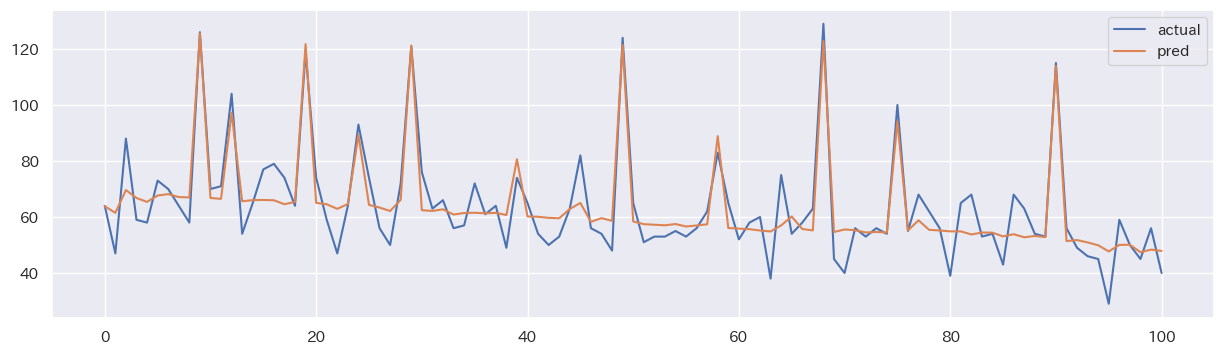

In [ ]:
model1, model2 = learning(trainX,y_train)
pred = model1.predict(trainX["days"].values.reshape(-1,1)) + model2.predict(trainX.iloc[:,~trainX.columns.str.match("y")])

p = pd.DataFrame({"actual":y_train,"pred":pred})
p.plot(figsize=(15,4))
print("RMSE",MSE(y_train,pred)**0.5)

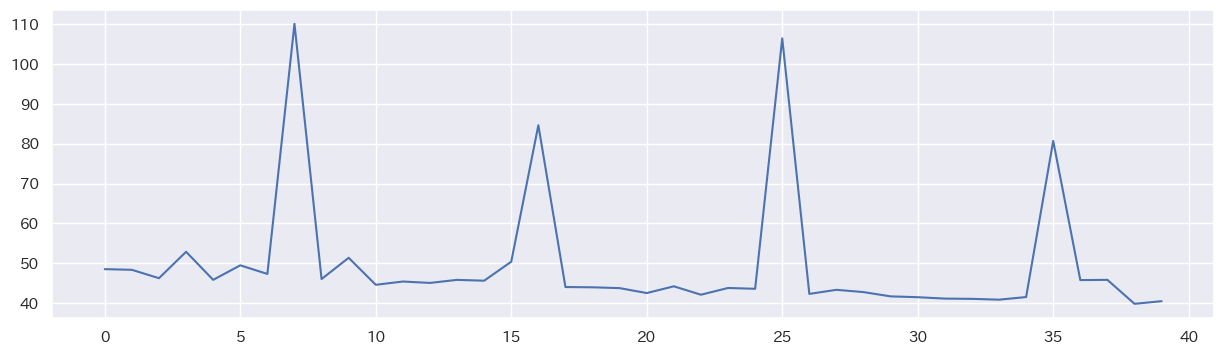

In [ ]:
model1, model2 = learning(trainX,y_train)
pred = model1.predict(testX["days"].values.reshape(-1,1)) + model2.predict(testX.iloc[:,~testX.columns.str.match("y")])
plt.figure(figsize=(15,4))
plt.plot(pred)

In [ ]:
sample[1] = pred
file_path = "/content/drive/MyDrive/データサイエンティスト/SIGNATE/お弁当/submit01.csv"  # 保存先のパスを指定
sample.to_csv(file_path, index=None, header=None)